# Data description

The data set consists of the expression levels of 77 proteins/protein modifications that produced detectable signals in the nuclear fraction of cortex. There are 38 control mice and 34 trisomic mice (Down syndrome), for a total of 72 mice. In the experiments, 15 measurements were registered of each protein per sample/mouse. Therefore, for control mice, there are 38x15, or 570 measurements, and for trisomic mice, there are 34x15, or 510 measurements. The dataset contains a total of 1080 measurements per protein. Each measurement can be considered as an independent sample/mouse.

The eight classes of mice are described based on features such as genotype, behavior and treatment. According to genotype, mice can be control or trisomic. According to behavior, some mice have been stimulated to learn (context-shock) and others have not (shock-context) and in order to assess the effect of the drug memantine in recovering the ability to learn in trisomic mice, some mice have been injected with the drug and others have not.


***Classes:***
c-CS-s: control mice, stimulated to learn, injected with saline (9 mice)
    
c-CS-m: control mice, stimulated to learn, injected with memantine (10 mice)
    
c-SC-s: control mice, not stimulated to learn, injected with saline (9 mice)
    
c-SC-m: control mice, not stimulated to learn, injected with memantine (10 mice)

t-CS-s: trisomy mice, stimulated to learn, injected with saline (7 mice)
    
t-CS-m: trisomy mice, stimulated to learn, injected with memantine (9 mice)
    
t-SC-s: trisomy mice, not stimulated to learn, injected with saline (9 mice)
    
t-SC-m: trisomy mice, not stimulated to learn, injected with memantine (9 mice)

***The aim is to identify subsets of proteins that are discriminant between the classes.***

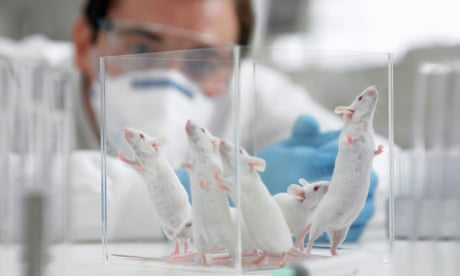

***Attribute Information:***

1 Mouse ID

2..78 Values of expression levels of 77 proteins; the names of proteins are followed by â€œ_nâ€ indicating that they were measured in the nuclear fraction. For example: DYRK1A_n

79 Genotype: control (c) or trisomy (t)
    
80 Treatment type: memantine (m) or saline (s)
    
81 Behavior: context-shock (CS) or shock-context (SC)
    
82 Class: c-CS-s, c-CS-m, c-SC-s, c-SC-m, t-CS-s, t-CS-m, t-SC-s, t-SC-m

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Importing and checking the data

In [2]:
data=pd.read_csv(r"C:\Users\ADMIN\Desktop\DATA SCIENCE projects\mice protein classification\data\mice.csv")
df=pd.DataFrame(data)
df.head()


,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
DYRK1A_N,1077.0,0.425810,0.249362,0.145327,0.288121,0.366378,0.487711,2.516367
ITSN1_N,1077.0,0.617102,0.251640,0.245359,0.473361,0.565782,0.698032,2.602662
BDNF_N,1077.0,0.319088,0.049383,0.115181,0.287444,0.316564,0.348197,0.497160
NR1_N,1077.0,2.297269,0.347293,1.330831,2.057411,2.296546,2.528481,3.757641
NR2A_N,1077.0,3.843934,0.933100,1.737540,3.155678,3.760855,4.440011,8.482553
...,...,...,...,...,...,...,...,...
SYP_N,1080.0,0.446073,0.066432,0.258626,0.398082,0.448459,0.490773,0.759588
H3AcK18_N,900.0,0.169609,0.059402,0.079691,0.125848,0.158240,0.197876,0.479763
EGR1_N,870.0,0.183135,0.040406,0.105537,0.155121,0.174935,0.204542,0.360692
H3MeK4_N,810.0,0.205440,0.055514,0.101787,0.165143,0.193994,0.235215,0.413903


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

In [5]:
df.shape

(1080, 82)

missing values 1396


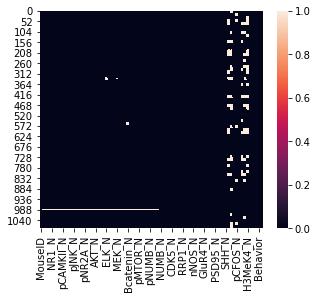

In [6]:
# counting and visualising the missing values
plt.figure(figsize=(5,4))
sns.heatmap(df.isnull())
print("missing values",df.isnull().sum().sum())

***observation***:there are too many missing values to simply delete the rows,there are 4-5 such columns having too many missing values
    we may drop those columns but that may lead to loss of information


# Exploratory data analysis

<AxesSubplot:>

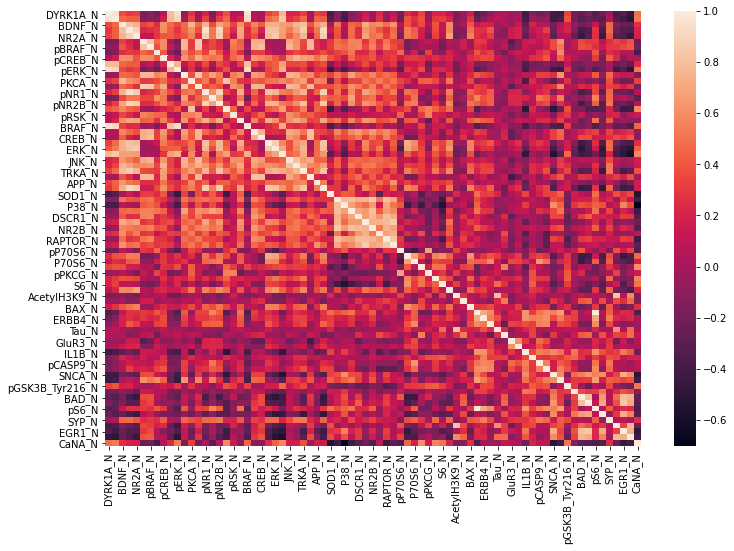

In [7]:
# a correlation heatmap of the numerical data
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())

In [8]:
#separating the numerical and categorical features
def feature_types(df):
    categ = []
    numer = []
    for c in df.columns:
        if df[c].dtype == 'object': categ.append(c)
        else: numer.append(c)
    return categ, numer
categ,numer=feature_types(df)


print("the categorical fdeatures in the dataset are::::",categ)




the categorical fdeatures in the dataset are:::: ['MouseID', 'Genotype', 'Treatment', 'Behavior', 'class']


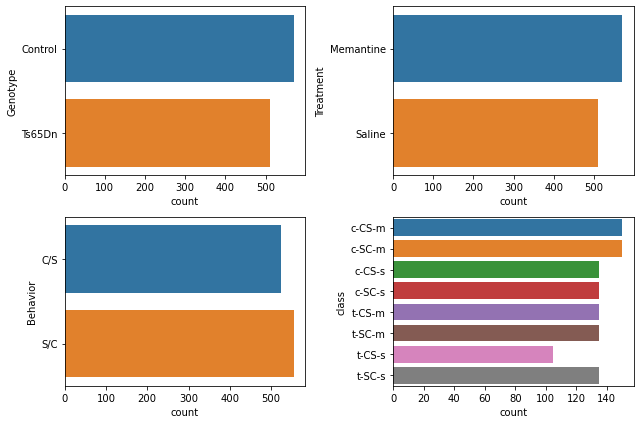

In [9]:
# since mouse ID is not a feature we will update the categ list and visualize all of them
categ=['Genotype', 'Treatment', 'Behavior', 'class']
fig,ax=plt.subplots(ncols=2,nrows=2,figsize=(9,6))
index=0
ax=ax.flatten()

for i in categ:
    sns.countplot(y=i,data=df,ax=ax[index]) 
    index+=1
    
plt.tight_layout()   

From the countplots below, we see that the classes are derived from the values of the categorical features. Therefore these features are encoded into the classes and we will not use them for model training.

***Identifying the most important features for analysis***

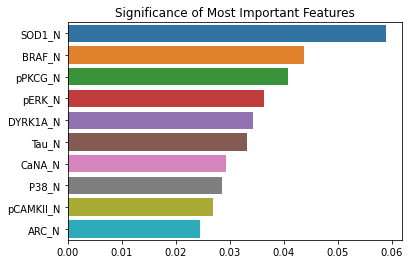

In [10]:
# temoporarily remove null values and scale the data in order to visualize the most important features
from sklearn.preprocessing import MinMaxScaler

nonna=df.dropna(axis=1,thresh=901)
nonna=df.dropna(axis=0,how="any")
categ,numeri=feature_types(nonna)
scaler=MinMaxScaler()
scaled=scaler.fit_transform(nonna[numeri].values)

#transforming my categorical data and fitting it to a classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder

ordinal= OrdinalEncoder()
labels = ordinal.fit_transform(nonna['class'].values[:,np.newaxis]).astype('int').squeeze()

forest=RandomForestClassifier(n_estimators=1000, max_depth=8, random_state=33)
forest.fit(scaled,labels)

#visualizing the most important features
feats=np.argsort(forest.feature_importances_)[-10:]
sns.barplot(y=nonna[numeri].columns[feats][::-1], 
            x=forest.feature_importances_[feats][::-1])
plt.title('Significance of Most Important Features');

as we can see the above feature which are the most important features now we explore these most important features

***Analysing the most important features***

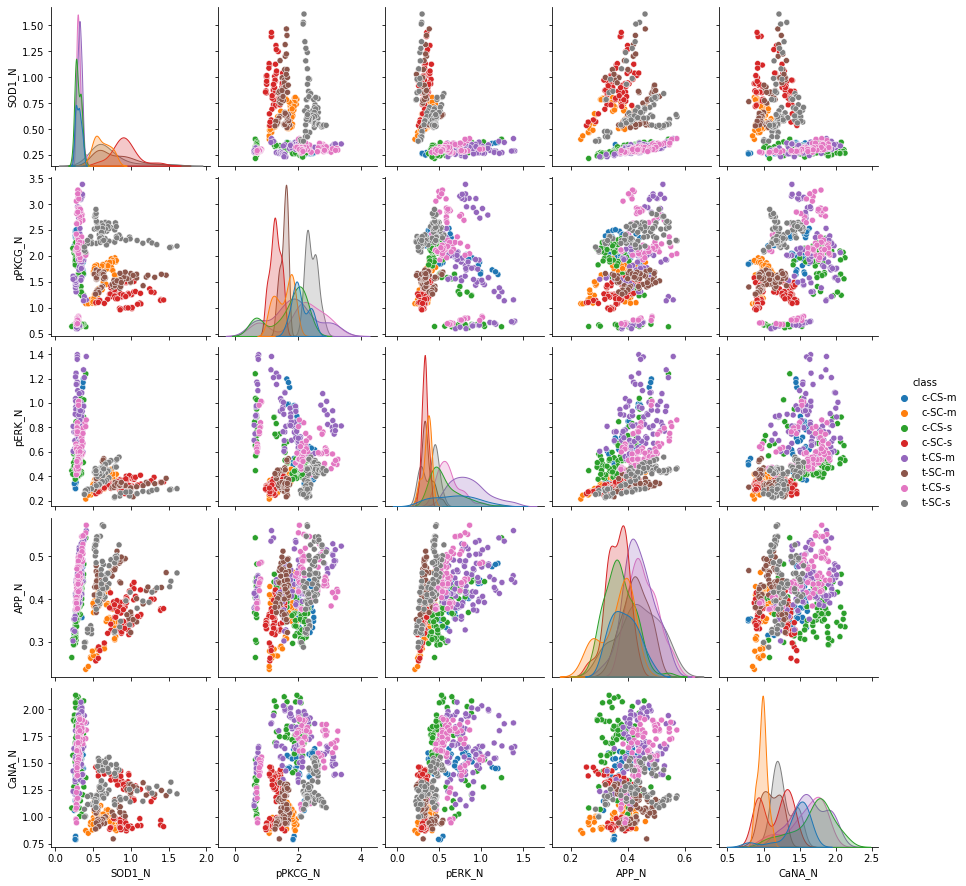

In [11]:
feats = ['SOD1_N', 'pPKCG_N', 'pERK_N', 'APP_N', 'CaNA_N']
#pairplots
sns.pairplot(nonna, vars=feats, hue='class');

In [12]:
#defining a function for analysis
import matplotlib.gridspec as gridspec
from scipy import stats

sns.set_style("darkgrid")

def three_chart_plot(df, feature):

    fig = plt.figure(constrained_layout = True, figsize = (12, 8))
    grid = gridspec.GridSpec(ncols = 3, nrows = 3, figure = fig)
    
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    
    sns.distplot(df.loc[:, feature], norm_hist = True, ax = ax1)
    plt.axvline(x = df[feature].mean(), c = 'red')
    plt.axvline(x = df[feature].median(), c = 'green')
    
    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('QQ_plot')
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])

    ## Set title. 
    ax3.set_title('Box Plot')
    sns.boxplot(df.loc[:,feature], ax = ax3 ,orient = 'v')
    
    
    plt.tight_layout()   

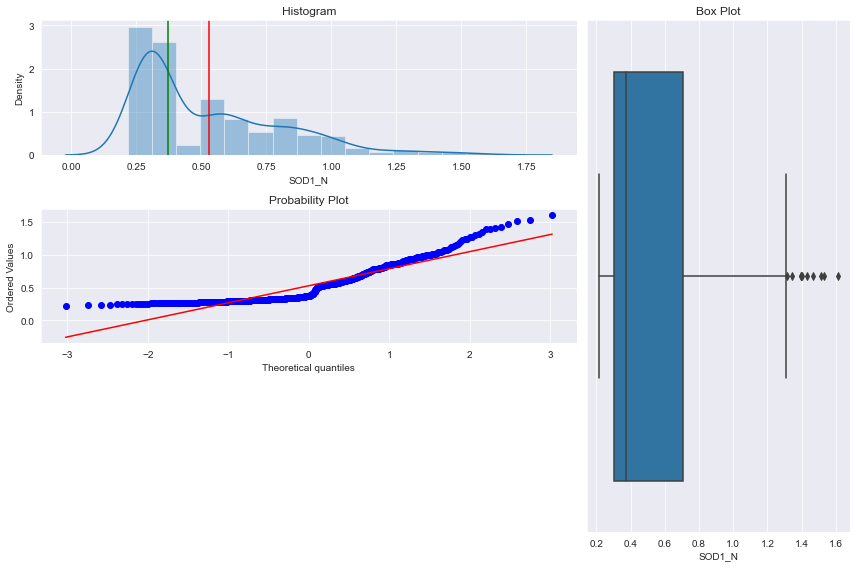

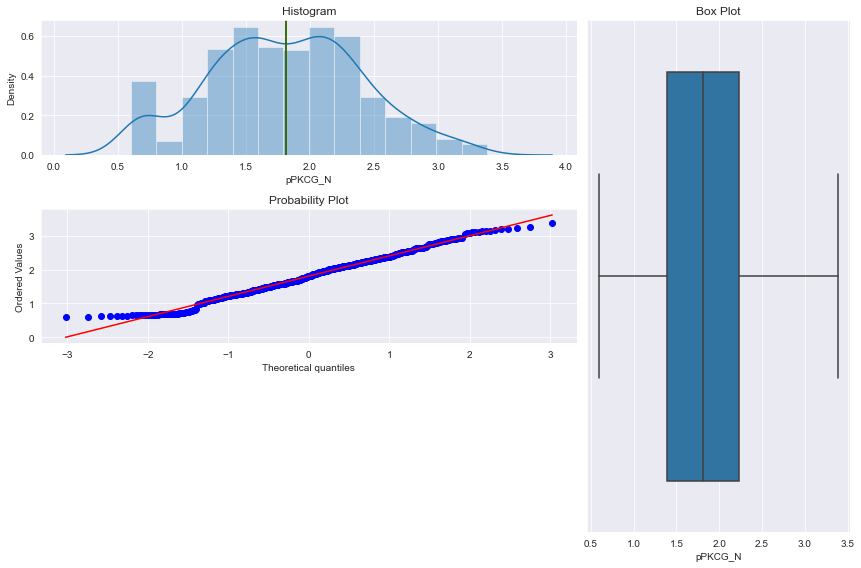

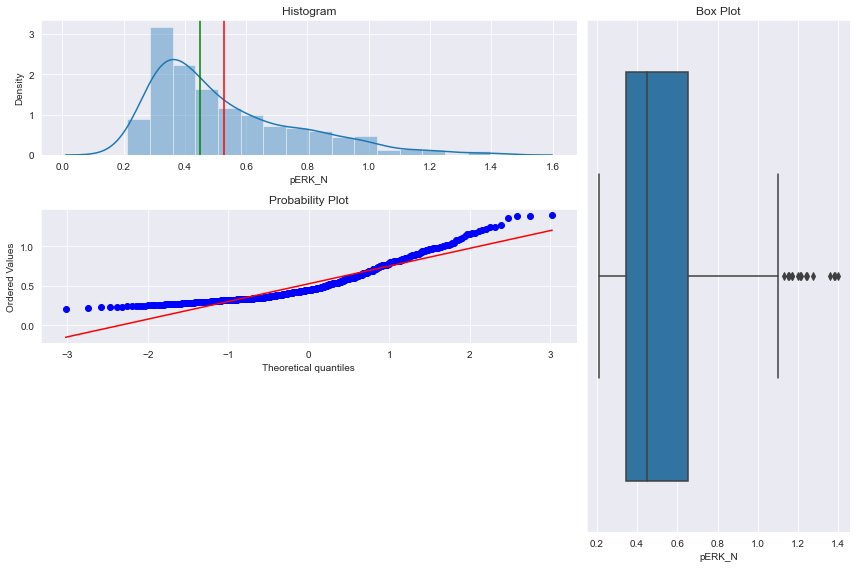

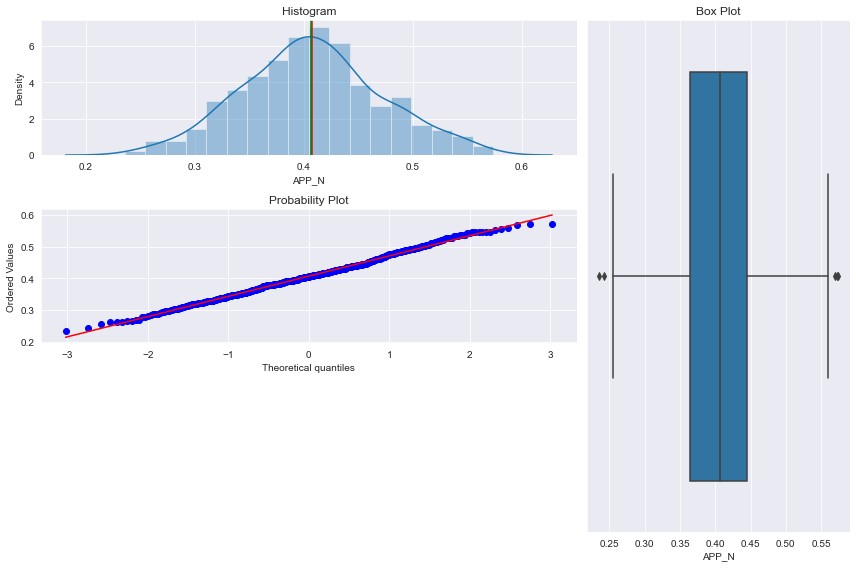

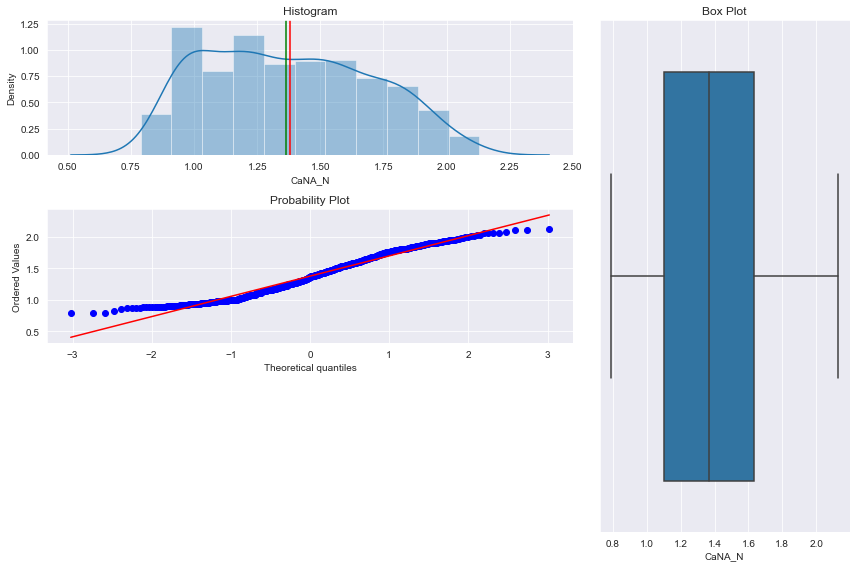

In [13]:
#visualizing the important features
for i in feats:
    three_chart_plot(nonna,i)

# Modeling

***Preprocessing the data***

In [14]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split

#splitting my data into input and output(only taking the numerical features)
x=df.loc[:,numer].values
y=df["class"]

#imputing the missing values
imp=SimpleImputer(missing_values=np.nan,strategy='mean')
x=imp.fit_transform(x)

#scaling the data
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

#encoding the categorical target
lbl=LabelEncoder()
y=lbl.fit_transform(y)

#applying train test split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=33)

#checking the shapes
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((864, 77), (216, 77), (864,), (216,))

now that we have preprocessed the data and checked it's shape we are ready to apply the machine learning algorithms in it
after that we will apply the model training for each of those algorithms and choose the best one

***Checking for best algos using cross validation***

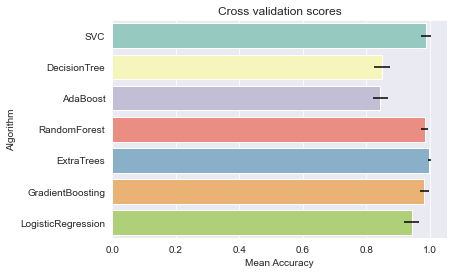

In [15]:
#Importing models and metrics for classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import cross_val_score,StratifiedKFold


#Creating list of all the classifier algorithms
kfold = StratifiedKFold(n_splits=10)
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(LogisticRegression(random_state = random_state))


#List of cross validation results
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, xtrain, y = ytrain, scoring = "accuracy", cv = kfold, n_jobs=4))


#Finding the mean of all the folds and modifying the cross validation results
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())


#Creating a dataframe consisting of 3 columns::(crossvalmeans,crossvalerrors and classifiermodels)       
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","LogisticRegression"]})


#Barplot to visualize the best models
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

the best models are Randomforest,Extratress,SVC and GradientBoosting hence we will be performing hyperparameter tuning and checking all these models

***Hyperparameter tuning of the best models***

In [21]:
#Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer

#selecting the hyperparameters to work upon
hyperparameters={"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}

#finding and printing the best parameters
scorer = make_scorer(f1_score, average = 'weighted')
rfc=RandomForestClassifier()
rfc_gs=GridSearchCV(estimator=rfc,param_grid=hyperparameters,scoring=scorer)
rfc_gs.fit(xtrain,ytrain)

#printing the classification report
print("***test classification report***")
ypred=rfc_gs.predict(xtest)
print(classification_report(ypred,ytest))



***test classification report***
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        25
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00        29

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216



In [26]:
#ExtraTreesClassfier

#selecting the hyperparameters to work upon
hyperparameters={"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}

#finding and printing the best parameters
scorer = make_scorer(f1_score, average = 'weighted')
etc=ExtraTreesClassifier()
etc_gs=GridSearchCV(estimator=etc,param_grid=hyperparameters,scoring=scorer)
etc_gs.fit(xtrain,ytrain,)

#printing the classification report
print("***test classification report***")
ypred=etc_gs.predict(xtest)
print(classification_report(ypred,ytest))



***test classification report***
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        25
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00        29

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216



In [27]:
#SVC
#selecting the hyperparameters to work upon
hyperparameters={'kernel': ['rbf','linear','poly'], 
                  'C': [.1,1, 10, 50, 100,200,300, 1000],
                 'degree':[3,5,8]}

#finding and printing the best parameters
scorer = make_scorer(f1_score, average = 'weighted')
svc=SVC()
svc_gs=GridSearchCV(estimator=svc,param_grid=hyperparameters,scoring=scorer)
svc_gs.fit(xtrain,ytrain)

#printing the classification report
print("***test classification report***")
ypred=svc_gs.predict(xtest)
print(classification_report(ypred,ytest,))



***test classification report***
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        25
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00        29

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216



***plotting the learing curves of these models***

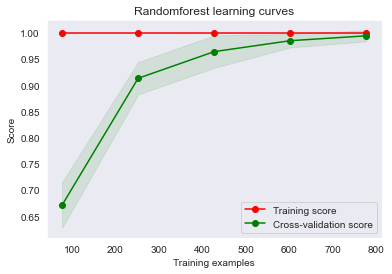

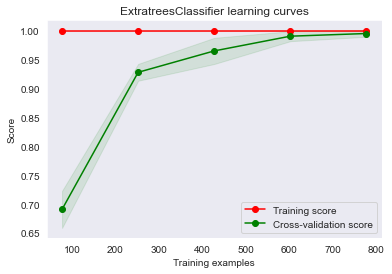

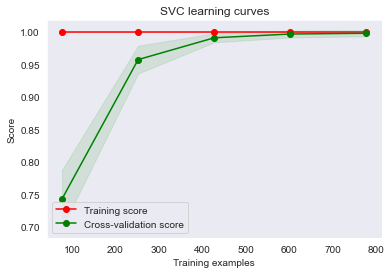

In [28]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, x,y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, x, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

#plotting & visualizing the hyperparameter tuned models
g = plot_learning_curve(rfc_gs.best_estimator_,"Randomforest learning curves",xtrain,ytrain,cv=kfold)
g = plot_learning_curve(etc_gs.best_estimator_,"ExtratreesClassifier learning curves",xtrain,ytrain,cv=kfold)
g = plot_learning_curve(svc_gs.best_estimator_,"SVC learning curves",xtrain,ytrain,cv=kfold)
